### Chapter 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

In [2]:
import pandas as pd

chipo = pd.read_csv('data/chipotle.tsv', sep = '\t')

print(chipo.shape)
print('-----------------------------------------------------------------------------')
print(chipo.info())
chipo.head(10)

(4622, 5)
-----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [4]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


In [5]:
## best top 10 items 
chipo['item_name'].value_counts()[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [6]:
## How many orders  by items?
chipo.groupby('item_name')['order_id'].count()[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [7]:
## How many quantity  by items?
chipo.groupby('item_name')['quantity'].count()[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

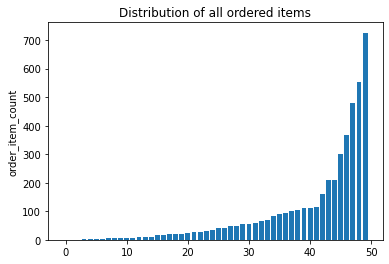

In [52]:
item_quantity = chipo.groupby('item_name')['quantity'].count()

item_names = item_quantity.index.tolist()
x_pos = np.arange(len(item_names))   ## item 갯수를 x축으로 사용 
order_cnt = item_quantity.values.tolist()
order_cnt.sort()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('order_item_count')
plt.title('Distribution of all ordered items')
plt.show()

In [10]:
## item_price에서 달러표시 제거하고 수치 타입으로 변경 
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [11]:
## order당 평균 계산금액 
avg_pay = chipo.groupby('order_id')['item_price'].sum().mean()
round(avg_pay, 1)

18.8

In [12]:
## 20$ 이상 지불한 order_id 찾기 
chipo_orderid_group = chipo.groupby('order_id').sum()  ## order_idr 기준으로 주문수량과 가격 합계를 구함 
chipo_orderid_group

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [13]:
more_than_20dollar = chipo_orderid_group[chipo_orderid_group['item_price'] >= 20]
more_than_20dollar

,quantity,item_price
order_id,,
1000,2,20.50
1004,2,21.96
1006,8,71.40
1010,5,33.24
1012,2,22.50
...,...,...
987,2,23.00
995,3,24.95
996,4,43.00


In [19]:
## item별 가격 알아내기 
chipo_one_item = chipo[chipo['quantity'] ==1]   ## 1종의 item만 판매된 건들을 별도 추출 
price_per_item = chipo_one_item.groupby('item_name').min()  ## 그룹당 여러개의 item이 존재, 최소값만 추출 
price_per_item.sort_values(by = 'item_price', ascending = False) [:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [20]:
price_per_item.sort_values(by = 'item_price') [:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


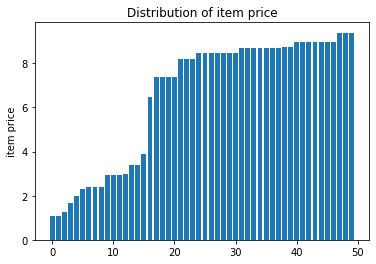

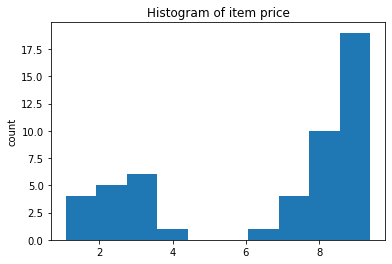

In [35]:
item_names = price_per_item.index.tolist() 
x_pos = np.arange(len(item_names))
item_price = price_per_item['item_price'].tolist()
item_price.sort()

## bar chart 
plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price')
plt.title('Distribution of item price')
plt.show() 

## histogram
plt.hist(item_price)
plt.ylabel('count')
plt.title('Histogram of item price')
plt.show()

In [36]:
## 가장 비싼 주문건(max item_price) 찾기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending = False)

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


In [40]:
## 특정 item이 몇번 주문되었는지 찾아보기 
find_item = 'Veggie Salad Bowl'

a1 = chipo[chipo['item_name'] == find_item]
a2 = a1.drop_duplicates(['order_id', 'item_name'])

print(a2.shape)
a2.head()

(18, 5)


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [49]:
## 특정 아이템을 2번이상 주문한 횟수 구하기 
find_item = 'Chicken Bowl'

a3 = chipo[chipo['item_name'] == find_item]
a4 = a3.groupby('order_id').sum()
a5 = a4[a4['quantity'] >= 2]

print(a5.shape)
print(a5.max())
a5.head()

(114, 2)
quantity       9.00
item_price    78.75
dtype: float64


,quantity,item_price
order_id,,
1004,2,21.96
1023,2,16.98
1072,2,17.50
1078,2,22.50
1091,2,20.00


### Summary of Q&A 
1. 가장 많이 팔린 아이템은? : Chicken Bowl 
2. 주문된 전체 아이템 종류는? : 50종 
3. 1회 주문당 평균 금액은? : 약 18$
4. 각 아이템들의 가격 분포는? : 주로 3$ 이하 제품들고, 7$ 이상 제품들로 구성되어 있다. 